In [2]:
import pickle
import acc_by_class
from acc_by_class import *
with open("Results/Experiment 8/5p_hyper_6C_10S_generation19_V3.pkl", "rb") as file: #os.path.join(path, latest_file), "rb") as file:
        population = pickle.load(file)
# Plotting(pop, experiment_num =0, use_classes = False)
N = 10
best_members = sorted(population.members, key=lambda m: max(m.accuracy_history), reverse=True)[:N]  # Top N members
import numpy as np
from collections import Counter

# Collect chromosomes from top members
best_chromosomes = np.array([m.chromosome for m in best_members])

# Analyze common values per position
for i in range(best_chromosomes.shape[1]):
    counts = Counter(best_chromosomes[:, i])
    most_common_value, frequency = counts.most_common(1)[0]
    print(f"Position {i}: Most common value = {most_common_value} (appears {frequency} times)")


Position 0: Most common value = 2 (appears 10 times)
Position 1: Most common value = 0 (appears 10 times)
Position 2: Most common value = 0 (appears 10 times)
Position 3: Most common value = 4 (appears 5 times)
Position 4: Most common value = 2 (appears 9 times)
Position 5: Most common value = 3 (appears 6 times)


In [14]:
S = population.settings
S

{'Instruction and Reasoning Approach': ['N/A',
  'Step-by-Step Guidance',
  'Simulate Dialogue Between Two People',
  'Outline Common Pitfalls'],
 'Creativity': ['N/A',
  'High Creativity',
  'Low Creativity',
  'Lateral Thinking'],
 'Examples Used': ['N/A', 'Single Example', 'Two Examples', 'Three Examples'],
 'Persona': ['N/A',
  'Grade school math teacher',
  'High-achieving student',
  'Determined learner',
  'Experienced Math Tutor'],
 'Assumptions Made': ['N/A',
  'No assumptions made',
  'Assumes given information is accurate',
  'Assumes given information is complete',
  'Makes reasonable assumptions'],
 'Difficulty Level': ['N/A', 'Easy', 'Intermediate', 'Hard', 'Very Hard']}

In [3]:
from itertools import combinations

# Identify pairs of chromosome positions that frequently co-occur
pair_counts = Counter()
for chromo in best_chromosomes:
    for (i, j) in combinations(range(len(chromo)), 2):
        pair_counts[(i, j, chromo[i], chromo[j])] += 1

# Print top co-occurring pairs
for (i, j, val_i, val_j), freq in pair_counts.most_common(10):
    print(f"Positions ({i}, {j}): Values ({val_i}, {val_j}) appear together {freq} times")


Positions (0, 1): Values (2, 0) appear together 10 times
Positions (0, 2): Values (2, 0) appear together 10 times
Positions (1, 2): Values (0, 0) appear together 10 times
Positions (0, 4): Values (2, 2) appear together 9 times
Positions (1, 4): Values (0, 2) appear together 9 times
Positions (2, 4): Values (0, 2) appear together 9 times
Positions (0, 5): Values (2, 3) appear together 6 times
Positions (1, 5): Values (0, 3) appear together 6 times
Positions (2, 5): Values (0, 3) appear together 6 times
Positions (4, 5): Values (2, 3) appear together 6 times


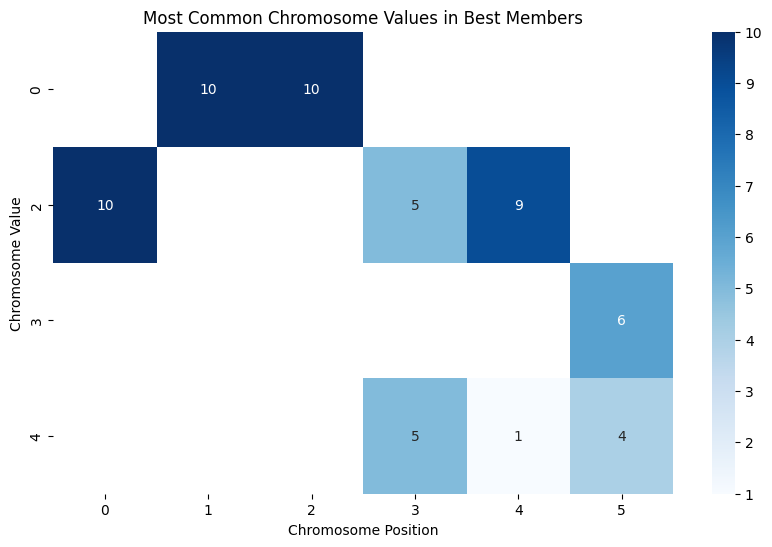

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Create a heatmap of chromosome frequencies
chromosome_df = pd.DataFrame(best_chromosomes)
plt.figure(figsize=(10, 6))
sns.heatmap(chromosome_df.apply(lambda x: x.value_counts().fillna(0)), annot=True, cmap="Blues")
plt.xlabel("Chromosome Position")
plt.ylabel("Chromosome Value")
plt.title("Most Common Chromosome Values in Best Members")
plt.show()


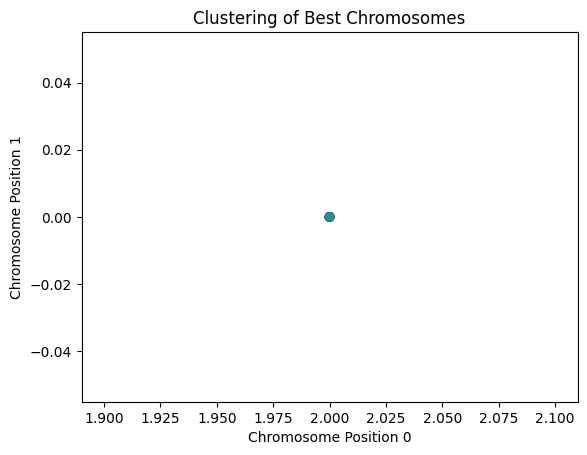

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(best_chromosomes)

# Plot clusters
plt.scatter(best_chromosomes[:, 0], best_chromosomes[:, 1], c=labels, cmap="viridis")
plt.xlabel("Chromosome Position 0")
plt.ylabel("Chromosome Position 1")
plt.title("Clustering of Best Chromosomes")
plt.show()


all best chromosomes within five points of the max

In [7]:
best_final_score = max(member.accuracy_history[-1] for member in population.members)
threshold = best_final_score - 5  # Define the threshold for near-optimal chromosomes
top_chromosomes = []

for member in population.members:
    for gen, score in enumerate(member.accuracy_history):
        if score >= threshold:
            top_chromosomes.append((gen, member.chromosome_history[gen]))  # Save generation and chromosome


In [8]:
import numpy as np
from collections import Counter

# Convert to numpy array for easier analysis
chromosome_array = np.array([chromo for _, chromo in top_chromosomes])

# Check common values at each chromosome position
for i in range(chromosome_array.shape[1]):
    counts = Counter(chromosome_array[:, i])
    most_common_value, frequency = counts.most_common(1)[0]
    print(f"Position {i}: Most common value = {most_common_value} (appears {frequency} times)")


Position 0: Most common value = 2 (appears 133 times)
Position 1: Most common value = 0 (appears 109 times)
Position 2: Most common value = 0 (appears 106 times)
Position 3: Most common value = 4 (appears 72 times)
Position 4: Most common value = 4 (appears 71 times)
Position 5: Most common value = 3 (appears 81 times)


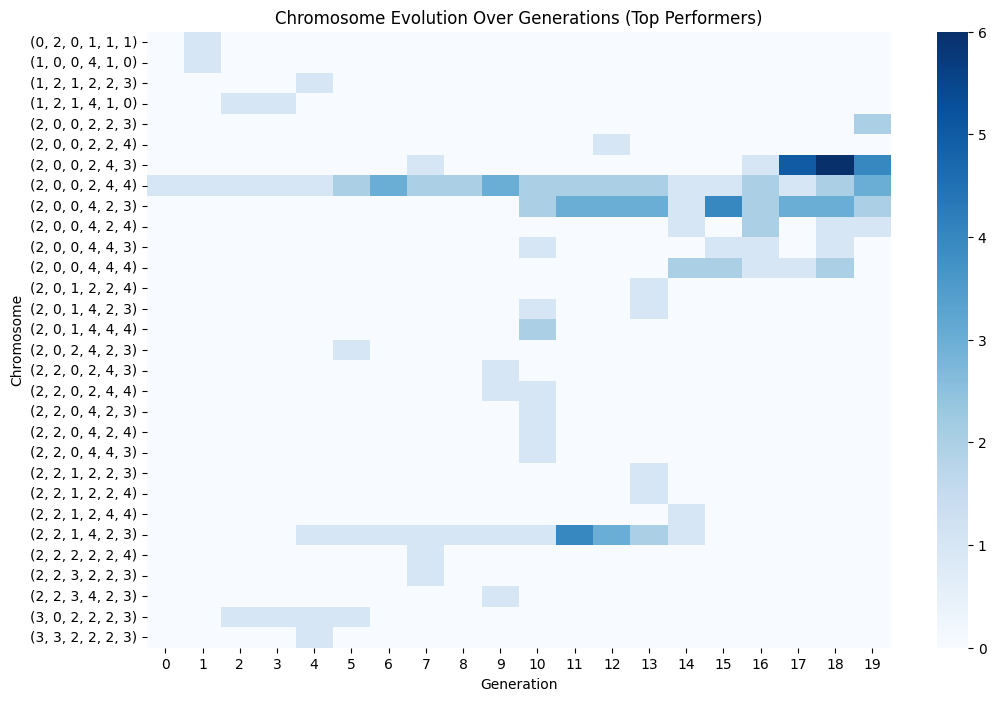

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to DataFrame for better handling
df = pd.DataFrame(top_chromosomes, columns=["Generation", "Chromosome"])
df["Chromosome"] = df["Chromosome"].apply(tuple)  # Convert lists to tuples for grouping

# Count occurrences of each chromosome per generation
chromosome_evolution = df.groupby(["Generation", "Chromosome"]).size().reset_index(name="Count")

# Pivot for heatmap visualization
pivot_table = chromosome_evolution.pivot(index="Chromosome", columns="Generation", values="Count").fillna(0)

# Plot heatmap of common chromosomes over generations
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=False, cmap="Blues", cbar=True)
plt.xlabel("Generation")
plt.ylabel("Chromosome")
plt.title("Chromosome Evolution Over Generations (Top Performers)")
plt.show()


In [10]:
from itertools import combinations

# Identify pairs of chromosome positions that frequently co-occur
pair_counts = Counter()
for _, chromo in top_chromosomes:
    for (i, j) in combinations(range(len(chromo)), 2):
        pair_counts[(i, j, chromo[i], chromo[j])] += 1

# Print top co-occurring pairs
for (i, j, val_i, val_j), freq in pair_counts.most_common(10):
    print(f"Positions ({i}, {j}): Values ({val_i}, {val_j}) appear together {freq} times")


Positions (0, 1): Values (2, 0) appear together 104 times
Positions (0, 2): Values (2, 0) appear together 104 times
Positions (1, 2): Values (0, 0) appear together 99 times
Positions (0, 5): Values (2, 3) appear together 75 times
Positions (0, 4): Values (2, 4) appear together 71 times
Positions (0, 3): Values (2, 4) appear together 69 times
Positions (2, 4): Values (0, 4) appear together 68 times
Positions (1, 4): Values (0, 4) appear together 66 times
Positions (0, 3): Values (2, 2) appear together 64 times
Positions (0, 4): Values (2, 2) appear together 62 times


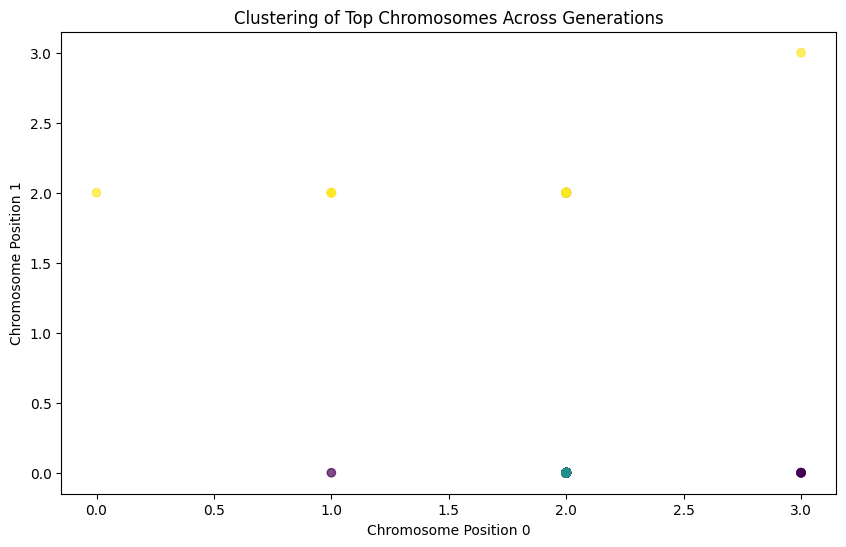

In [11]:
from sklearn.cluster import KMeans

# Cluster chromosomes into different strategies
num_clusters = 3  # Adjust based on how many distinct strategies you expect
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(chromosome_array)

# Plot clusters
plt.figure(figsize=(10, 6))
plt.scatter(chromosome_array[:, 0], chromosome_array[:, 1], c=labels, cmap="viridis", alpha=0.7)
plt.xlabel("Chromosome Position 0")
plt.ylabel("Chromosome Position 1")
plt.title("Clustering of Top Chromosomes Across Generations")
plt.show()


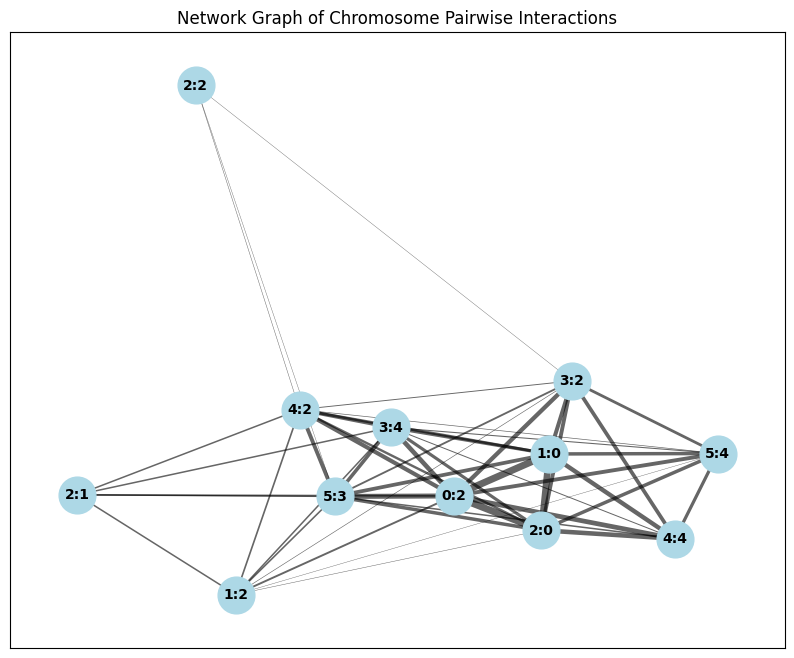

In [16]:
import networkx as nx

# Create a graph
G = nx.Graph()

# Add edges based on co-occurrence frequency
for (i, j, val_i, val_j), count in pair_counts.items():
    if count > 5:  # Only include strong relationships
        G.add_edge(f"{i}:{val_i}", f"{j}:{val_j}", weight=count)

# Set up positions and plot
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # Spring layout for better visualization
edges = G.edges(data=True)
weights = [d['weight'] for (_, _, d) in edges]

# Draw network
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="lightblue")
nx.draw_networkx_edges(G, pos, width=[w / max(weights) * 5 for w in weights], alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

plt.title("Network Graph of Chromosome Pairwise Interactions")
plt.show()


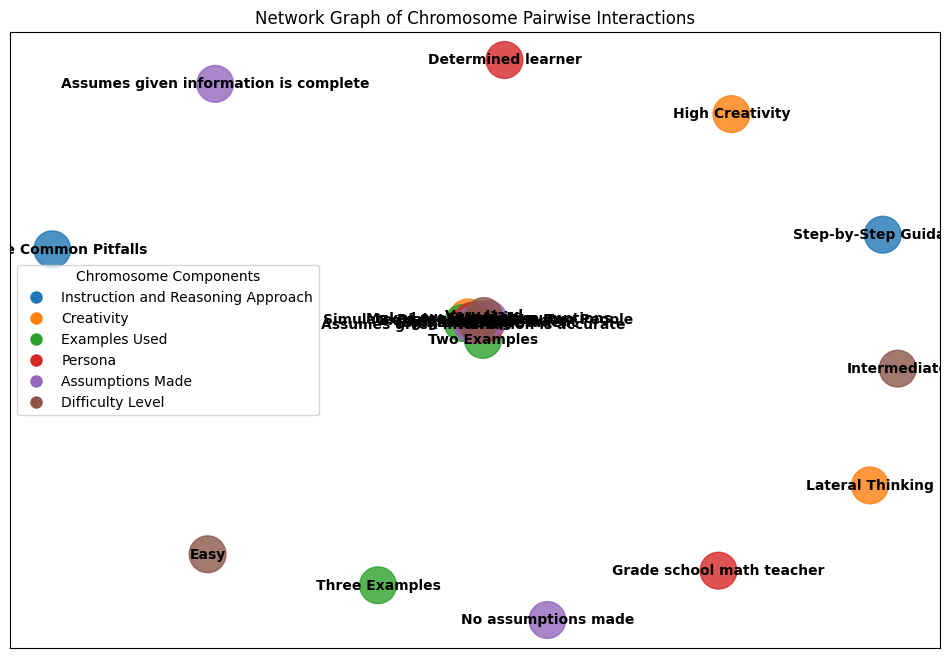

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Step 1: Extract setting names for each chromosome position
settings_dict = population.settings  # Dictionary mapping components to possible values

def decode_chromosome(chromosome):
    """Convert chromosome indices to setting names using population.settings."""
    return [settings_dict[component][chromosome[i]] for i, component in enumerate(settings_dict)]

# Step 2: Collect high-performing chromosomes
# top_chromosomes = [chromo for _, chromo in top_chromosomes]

# Step 3: Count pairwise occurrences of settings
pair_counts = Counter()
for chromo in top_chromosomes:
    decoded_chromo = decode_chromosome(chromo)
    for i, setting_i in enumerate(decoded_chromo):
        for j, setting_j in enumerate(decoded_chromo):
            if i < j:  # Avoid duplicate counting
                pair_counts[(setting_i, setting_j)] += 1

# Step 4: Create Network Graph
G = nx.Graph()

# Add nodes with colors based on their component
node_colors = {}
component_colors = {comp: f"C{i}" for i, comp in enumerate(settings_dict.keys())}  # Unique color per component

for comp_idx, comp_name in enumerate(settings_dict.keys()):
    for setting in settings_dict[comp_name]:
        G.add_node(setting, component=comp_name)  # Assign component as attribute
        node_colors[setting] = component_colors[comp_name]

# Add edges based on co-occurrence frequency
for (setting_i, setting_j), count in pair_counts.items():
    if count > 5:  # Filter out weak interactions
        G.add_edge(setting_i, setting_j, weight=count)

# Step 5: Draw the Graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Generate node positions
edges = G.edges(data=True)
weights = [d['weight'] for (_, _, d) in edges]

# Draw nodes with colors
nx.draw_networkx_nodes(G, pos, node_color=[node_colors[n] for n in G.nodes], node_size=700, alpha=0.8)

# Draw edges with varying thickness based on weight
nx.draw_networkx_edges(G, pos, width=[(w / max(weights)) * 5 for w in weights], alpha=0.6)

# Add labels
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

# Create legend for component colors
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=comp)
                  for comp, color in component_colors.items()]
plt.legend(handles=legend_handles, title="Chromosome Components", loc="best")

plt.title("Network Graph of Chromosome Pairwise Interactions")
plt.show()


In [22]:
nx.write_graphml(G, 'chromosome_over_40_network.graphml')

In [24]:
import csv
import os
from itertools import combinations
from collections import Counter

# Define output filenames
nodes_filename = "network_nodes.csv"
edges_filename = "network_edges.csv"

# Ensure output directory exists
os.makedirs("gephi_output", exist_ok=True)
nodes_filepath = os.path.join("gephi_output", nodes_filename)
edges_filepath = os.path.join("gephi_output", edges_filename)

# ---- STEP 1: BUILD NODES ----
nodes = []
node_id_map = {}  # Maps (component, setting) to node ID
node_index = 0

# Create nodes from settings
for component, setting_list in population.settings.items():
    for setting in setting_list:
        node_id = f"{component}:{setting}"
        node_id_map[(component, setting)] = node_index
        nodes.append([node_index, setting, component])  # [ID, Label, Category]
        node_index += 1

    # Add N/A node for this component
    na_id = f"{component}:N/A"
    node_id_map[(component, "N/A")] = node_index
    nodes.append([node_index, "N/A", component])
    node_index += 1

# Write nodes to CSV
with open(nodes_filepath, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Id", "Label", "Category"])  # Gephi headers
    writer.writerows(nodes)

print(f"Nodes saved to {nodes_filepath}")

# ---- STEP 2: BUILD EDGES ----
edge_counts = Counter()

# Count co-occurrences across all high-performing chromosomes
for chromo in top_chromosomes:
    for (pos1, pos2) in combinations(range(len(chromo)), 2):
        component1, component2 = list(population.settings.keys())[pos1], list(population.settings.keys())[pos2]
        setting1, setting2 = population.settings[component1][chromo[pos1]], population.settings[component2][chromo[pos2]]

        node1 = node_id_map[(component1, setting1)]
        node2 = node_id_map[(component2, setting2)]
        
        edge_counts[(node1, node2)] += 1

# Write edges to CSV
with open(edges_filepath, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Source", "Target", "Weight"])  # Gephi headers
    for (node1, node2), weight in edge_counts.items():
        writer.writerow([node1, node2, weight])

print(f"Edges saved to {edges_filepath}")


Nodes saved to gephi_output/network_nodes.csv
Edges saved to gephi_output/network_edges.csv


In [26]:
import numpy as np
len(np.unique(top_chromosomes))

5

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.Series(top_chromosomes)
# Count category occurrences
counts = data.value_counts()
counts
# # Prepare data for plotting
# categories = list(counts.index)
# values = list(counts.values)

# # Create the bar chart
# plt.bar(categories, values)

# # Customize the plot
# plt.xlabel('Categories')
# plt.ylabel('Frequency')
# plt.title('Distribution of Categories')

# # Show the plot
# plt.show()

[2, 0, 0, 2, 4, 4]    35
[2, 0, 0, 4, 2, 3]    26
[2, 0, 0, 2, 4, 3]    17
[2, 2, 1, 4, 2, 3]    17
[2, 0, 0, 4, 4, 4]     8
[2, 0, 0, 4, 2, 4]     5
[3, 0, 2, 2, 2, 3]     4
[2, 0, 0, 4, 4, 3]     4
[2, 0, 1, 4, 4, 4]     2
[2, 0, 1, 4, 2, 3]     2
[1, 2, 1, 4, 1, 0]     2
[2, 2, 0, 2, 4, 4]     2
[2, 0, 0, 2, 2, 3]     2
[2, 0, 0, 2, 2, 4]     1
[2, 2, 1, 2, 4, 4]     1
[2, 0, 2, 4, 2, 3]     1
[2, 2, 0, 4, 4, 3]     1
[2, 2, 1, 2, 2, 3]     1
[2, 2, 0, 4, 2, 3]     1
[2, 2, 0, 2, 4, 3]     1
[0, 2, 0, 1, 1, 1]     1
[2, 2, 2, 2, 2, 4]     1
[2, 2, 1, 2, 2, 4]     1
[2, 2, 3, 4, 2, 3]     1
[3, 3, 2, 2, 2, 3]     1
[2, 2, 0, 4, 2, 4]     1
[1, 2, 1, 2, 2, 3]     1
[2, 2, 3, 2, 2, 3]     1
[1, 0, 0, 4, 1, 0]     1
[2, 0, 1, 2, 2, 4]     1
Name: count, dtype: int64

In [29]:
unique_bests = []
for i in top_chromosomes:
    if i not in unique_bests:
        unique_bests.append(i)

unique_bests

[[2, 0, 0, 2, 4, 3],
 [2, 0, 0, 2, 4, 4],
 [2, 0, 0, 2, 2, 4],
 [2, 0, 0, 4, 2, 3],
 [2, 0, 0, 2, 2, 3],
 [2, 2, 1, 2, 2, 3],
 [2, 0, 0, 4, 4, 3],
 [2, 0, 1, 4, 2, 3],
 [2, 2, 1, 4, 2, 3],
 [2, 0, 1, 4, 4, 4],
 [2, 2, 0, 4, 4, 3],
 [2, 0, 2, 4, 2, 3],
 [2, 2, 1, 2, 4, 4],
 [2, 0, 0, 4, 2, 4],
 [2, 2, 2, 2, 2, 4],
 [2, 2, 0, 2, 4, 3],
 [2, 2, 0, 4, 2, 3],
 [2, 0, 0, 4, 4, 4],
 [0, 2, 0, 1, 1, 1],
 [1, 2, 1, 4, 1, 0],
 [2, 2, 0, 2, 4, 4],
 [2, 2, 1, 2, 2, 4],
 [2, 2, 3, 4, 2, 3],
 [2, 2, 0, 4, 2, 4],
 [3, 3, 2, 2, 2, 3],
 [1, 2, 1, 2, 2, 3],
 [2, 2, 3, 2, 2, 3],
 [1, 0, 0, 4, 1, 0],
 [3, 0, 2, 2, 2, 3],
 [2, 0, 1, 2, 2, 4]]

In [30]:
len(unique_bests)

30